In [1]:
import torch
import cv2
from torchvision.utils import draw_segmentation_masks
from torchvision.transforms.functional import to_pil_image
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

hostname = os.uname().nodename
input_dir = "data/blood-vessel-segmentation/" if hostname == "gamma" else "/kaggle/input/blood-vessel-segmentation"
train_dir = input_dir + "/train/"
imgs_dir = f"{train_dir}kidney_1_dense/images/"
msks_dir = f"{train_dir}kidney_1_dense/labels/"
preds_dir = input_dir + "kidney_1_dense_preds/"
slices_ids = sorted(os.listdir(imgs_dir))

In [2]:
## Normalization stategy No. 1
# img = img.clip(35000) / img.clip(35000).max()
 
## Normalization strategy No. 2
# img = img.clip(35000) / 35000

# As the maximum value of the image is not necessarily 35000 then if it's less than 35000 strategy No. 1 just becomes:
# img = img / img.max()
# which is the same behaviour that gives bad performance, so maybe that is the reason why this is strategy performs worse than constant scaling.

In [3]:
idx_low_max = []
for idx, slice_id in tqdm(enumerate(slices_ids)):
    max_val = np.array(Image.open(imgs_dir + slice_id)).max()
    if max_val <= 35000:
       idx_low_max.append(idx)

2279it [00:04, 476.28it/s]


In [4]:
print("number of images with max values below 35000:", len(idx_low_max))

number of images with max values below 35000: 644


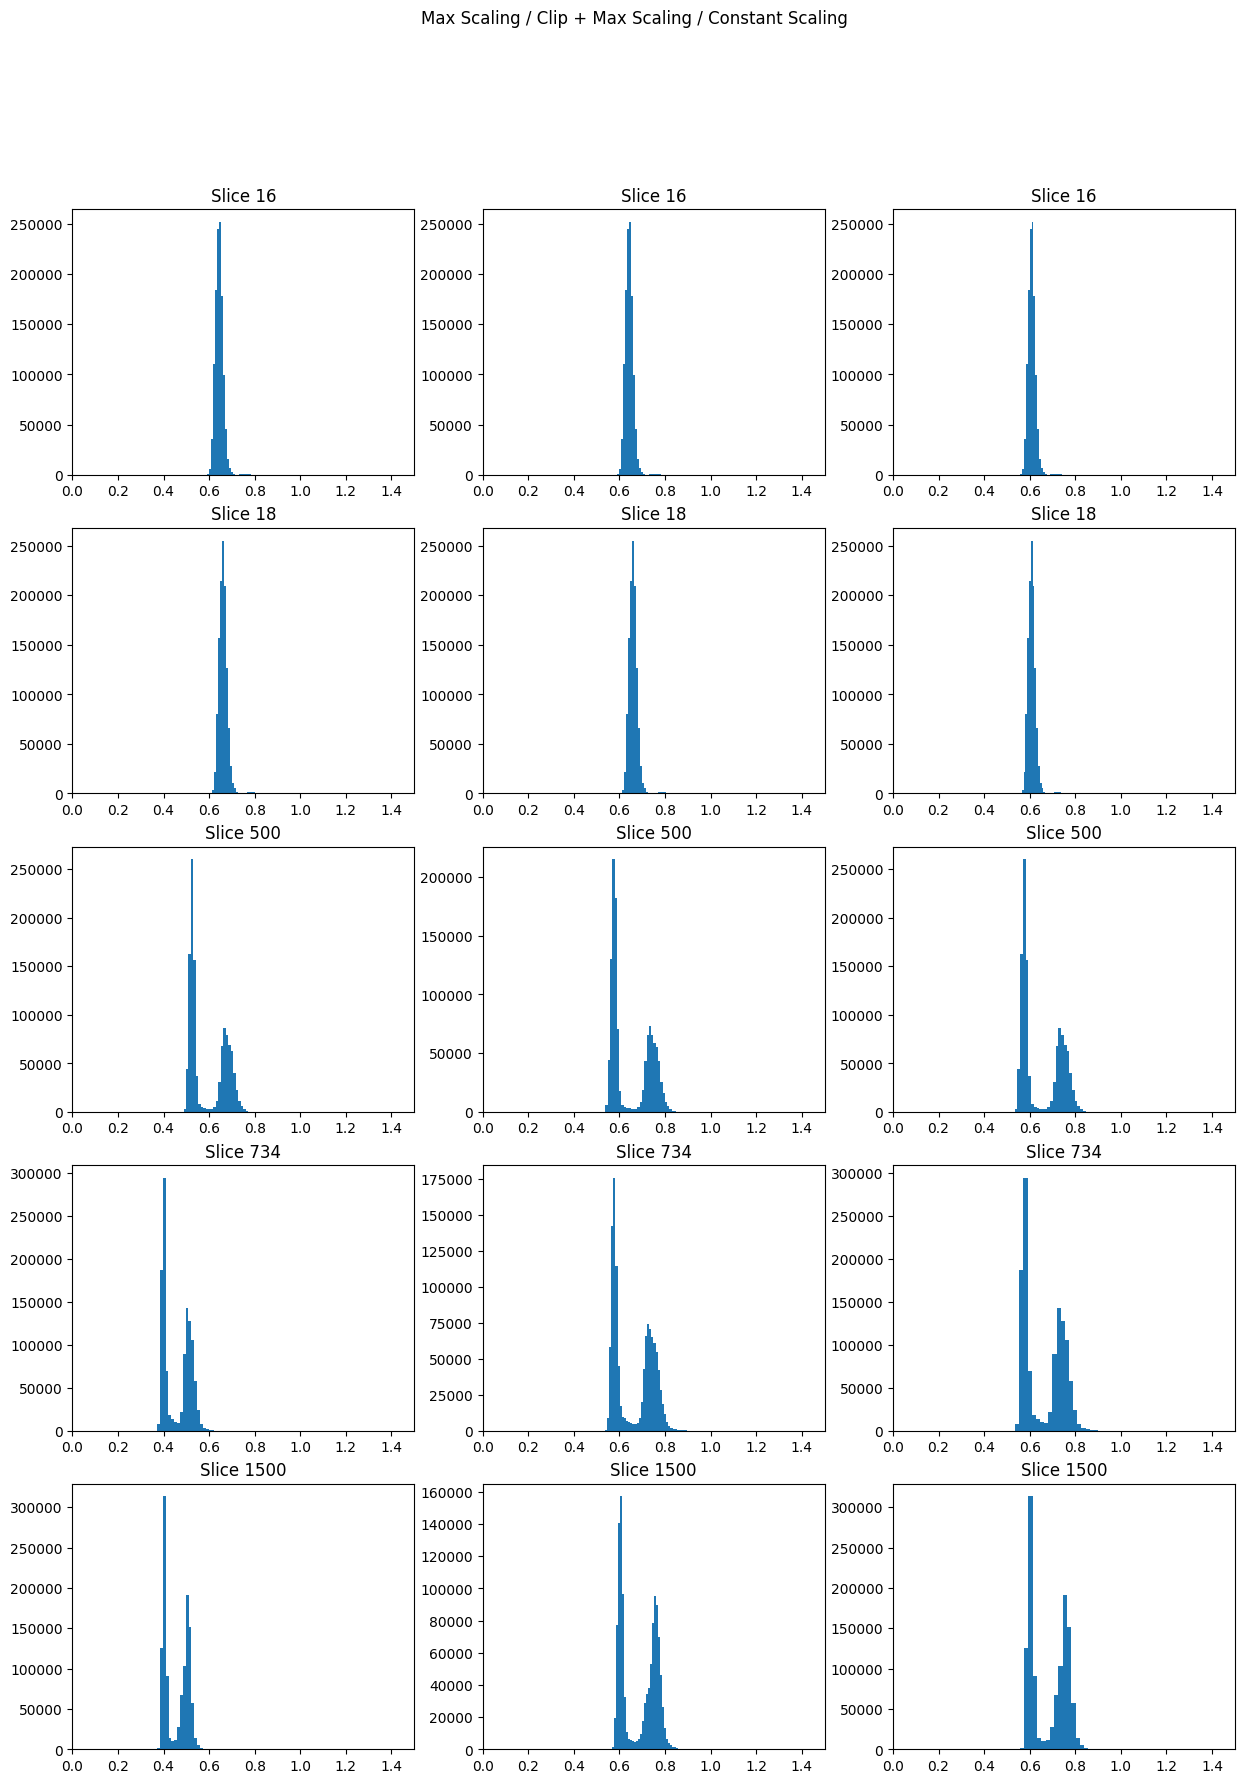

In [5]:
# ids = [500, 734, 735, 736]
# ids = np.random.randint(low=0, high=len(slices_ids), size=(2,))
ids = idx_low_max[5:7] + [500, 734, 1500]
const_scale = 35000
fig, axs = plt.subplots(len(ids), 3, figsize=(15, 4 * len(ids)))
fig.suptitle("Max Scaling / Clip + Max Scaling / Constant Scaling")


def three_norms(img, const):
    return img / img.max(), img / const, img.clip(max=const) / img.clip(max=const).max()

for axs_idx, id in enumerate(ids):


    img = np.array(Image.open(imgs_dir + slices_ids[id]))
    max_img, const_img, clipped_img = three_norms(img, const_scale)

    axs[axs_idx, 0].set_xlim([0, 1.5])
    axs[axs_idx, 1].set_xlim([0, 1.5])
    axs[axs_idx, 2].set_xlim([0, 1.5])

    axs[axs_idx, 0].set_title(f"Slice {id}")
    axs[axs_idx, 1].set_title(f"Slice {id}")
    axs[axs_idx, 2].set_title(f"Slice {id}")

    axs[axs_idx, 0].hist(max_img.reshape(-1), 50)
    axs[axs_idx, 1].hist(clipped_img.reshape(-1), 50)
    axs[axs_idx, 2].hist(const_img.reshape(-1), 50)

plt.show()